# Visualising distributions

In [69]:
import os
from dotenv import load_dotenv, find_dotenv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [70]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [71]:
load_dotenv(find_dotenv(usecwd=True));
data_folder=os.getenv('DATA_FOLDER')

In [72]:
figsize_rect = (9, 5)
figsize_square = (8, 8)

fs_xl = 36 # titles
fs_l = 24 # subtitles
fs_m = 16 # axes and tick labels
fs_s = 14 # small stuff

In [73]:
def stamp(ax, color, alpha, label, clip_on=False, linewidth=5, fontsize=fs_m):
    ax.text(1.0, 1.0, label + "  ", color=color, alpha=alpha, fontsize=fontsize, weight='bold',
            va='top', ha='right', transform=ax.figure.transFigure, clip_on=clip_on)
    ax.add_patch(mpl.patches.ConnectionPatch(xyA=(1, 0), xyB=(1, 1), coordsA="figure fraction", 
                                         coordsB="figure fraction", axesA=ax, axesB=ax, 
                                         color=color, alpha=alpha, linewidth=linewidth,
                                         capstyle='butt', transform=ax.figure.transFigure))

def stamp_good(ax):
    stamp(ax, "olivedrab", 0.7, "good")

def stamp_phantom(ax):
    stamp(ax, "transparent", 0, "")

def stamp_bad(ax):
    stamp(ax, "#d02138", 1, "bad")

def stamp_wrong(ax):
    stamp(ax, "#8E202C", 1, "wrong")

def stamp_ugly(ax):
    stamp(ax, "#DC9515", 1, "ugly")

## Histograms

In [74]:
titanics = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'titanic', 'Titanic.csv'))
titanics

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [85]:
counts, bin_edges = np.histogram(titanics['Age'], bins=np.linspace(0, 75, 16))
bin_edges[-1] += 1
df_bins = pd.DataFrame({'Age range': ['{:.0f}-{:.0f}'.format(b, bin_edges[i+1]-1) for i,b in enumerate(bin_edges[:-1])],
                        'Count': counts})
df_bins

,Age range,Count
0,0-4,33
1,5-9,20
2,10-14,15
3,15-19,81
4,20-24,139
5,25-29,113
6,30-34,93
7,35-39,75
8,40-44,47
9,45-49,59


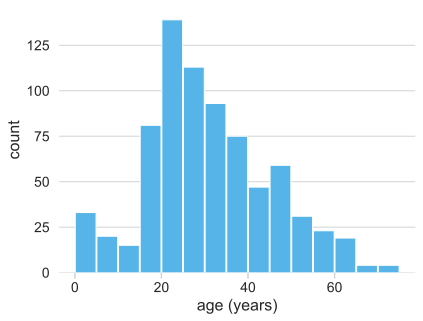

In [75]:
fig, ax = plt.subplots()

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(titanics['Age'], color="#56B4E9", 
                           bins=np.linspace(0, 75, 16),
                           rwidth=0.96) # , [:-1] bins=50

ax.set_ylabel('count', fontsize=fs_m)
ax.set_xlabel('age (years)', fontsize=fs_m)

for loc in ['right', 'top', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.xaxis.grid(False) #, color='lightgrey')

ax.set_yticks([0, 25, 50, 75, 100, 125])

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=fs_s, color='lightgrey',
               width=1.5)

plt.show()

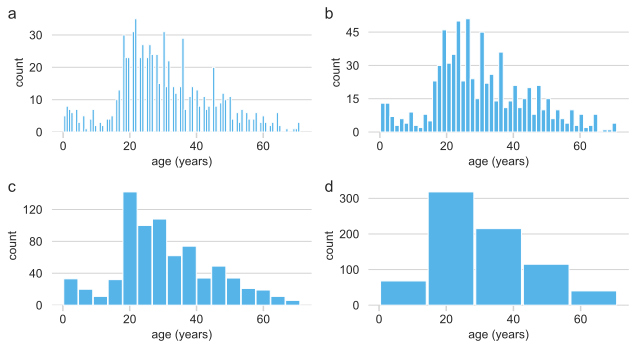

In [94]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,5))

letters = ['a', 'b', 'c', 'd']

for ax, nbins, letter in zip(axs.flat, [100, 50, 16, 5], letters):

    # N is the count in each bin, bins is the lower-limit of the bin
    N, bins, patches = ax.hist(titanics['Age'], color="#56B4E9", bins=nbins,
                               rwidth=0.96)

    ax.set_ylabel('count', fontsize=12)
    ax.set_xlabel('age (years)', fontsize=12)

    for loc in ['right', 'top', 'bottom', 'left']:
        ax.spines[loc].set_visible(False)

    # Add horizontal grid lines at the y-tick locations and set their color to light grey
    ax.xaxis.grid(False) 
    
    locator = mpl.ticker.MaxNLocator(nbins=4)
    
    ax.yaxis.set_major_locator(locator)

    # Add horizontal grid lines at the y-tick locations and set their color to light grey
    ax.yaxis.grid(True, color='lightgrey')


    # Move gridlines to the background
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', bottom=True, left=False, labelsize=12, color='lightgrey',
                width=1.5)
    
    # Add letter to the upper left corner
    ax.text(-0.17, 1.05, letter, transform=ax.transAxes, fontsize=16,
            verticalalignment='top')

plt.tight_layout()

plt.show()

## Density plots

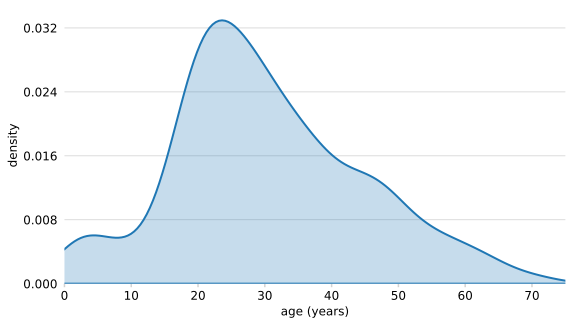

In [111]:
fig, ax = plt.subplots(figsize=(9,5))

ax = sns.kdeplot(data=titanics, x="Age", fill=True, linewidth=2)

ax.set_ylabel('density', fontsize=12)
ax.set_xlabel('age (years)', fontsize=12)

for loc in ['right', 'top', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

ax.set_xlim([0, 75])

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.xaxis.grid(False)

locator = mpl.ticker.MaxNLocator(nbins=5)

ax.yaxis.set_major_locator(locator)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=12, color='lightgrey',
            width=1.5)


plt.show()

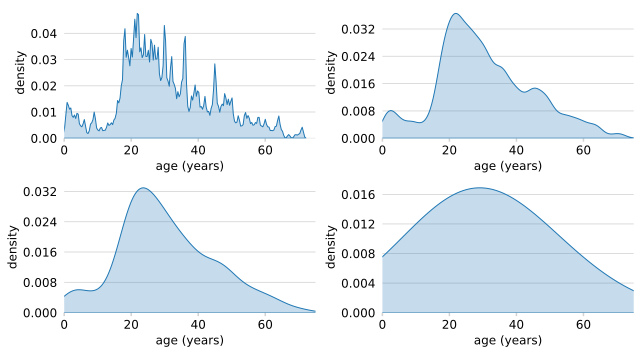

In [125]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,5))

for ax, bw_adjust in zip(axs.flat, [0.1, 0.5, 1.0, 5.0]):

    sns.kdeplot(data=titanics, x="Age", fill=True, linewidth=1,
                bw_adjust=bw_adjust, ax=ax)

    ax.set_ylabel('density', fontsize=12)
    ax.set_xlabel('age (years)', fontsize=12)

    for loc in ['right', 'top', 'bottom', 'left']:
        ax.spines[loc].set_visible(False)

    ax.set_xlim([0, 75])

    # Add horizontal grid lines at the y-tick locations and set their color to light grey
    ax.xaxis.grid(False)
    

    locator = mpl.ticker.MaxNLocator(nbins=5)

    ax.yaxis.set_major_locator(locator)

    # Add horizontal grid lines at the y-tick locations and set their color to light grey
    ax.yaxis.grid(True, color='lightgrey')

    # Move gridlines to the background
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', bottom=True, left=False, labelsize=12, color='lightgrey',
                width=1.5)


plt.tight_layout()

plt.show()

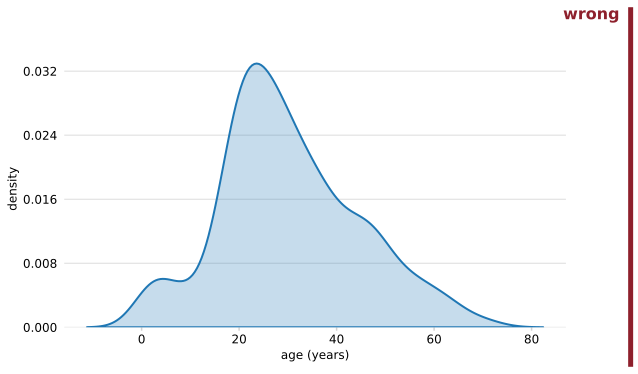

In [128]:
fig, ax = plt.subplots(figsize=(9,5))

ax = sns.kdeplot(data=titanics, x="Age", fill=True, linewidth=2)

ax.set_ylabel('density', fontsize=12)
ax.set_xlabel('age (years)', fontsize=12)

for loc in ['right', 'top', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.xaxis.grid(False)


locator = mpl.ticker.MaxNLocator(nbins=5)

ax.yaxis.set_major_locator(locator)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=12, color='lightgrey',
            width=1.5)


stamp_wrong(ax)

plt.show()

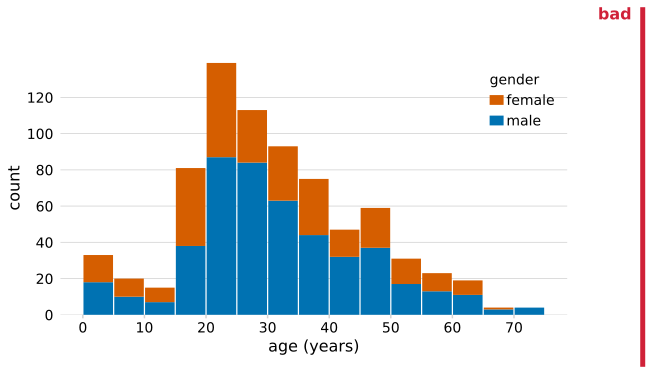

In [180]:
fig, ax = plt.subplots(figsize=figsize_rect)

ax.hist([titanics[titanics['Sex']=='male']['Age'],
         titanics[titanics['Sex']=='female']['Age']], bins=np.linspace(0, 75, 16),
         rwidth=0.96, density=False, histtype='bar', stacked=True , color=["#0072B2", "#D55E00"]
         )

ax.set_ylabel('count', fontsize=fs_m)
ax.set_xlabel('age (years)', fontsize=fs_m)

for loc in ['right', 'top', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.xaxis.grid(False) #, color='lightgrey')

ax.set_ylim([0,140])

ax.set_yticks([0, 20, 40, 60, 80, 100, 120])

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')


# Move gridlines to the background
ax.set_axisbelow(True)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=fs_s, color='lightgrey',
               width=1.5)

#create legend
handles = [mpl.patches.Rectangle((0,0),1,1,color=c,ec=None) for c in ["#D55E00", "#0072B2"]]
labels= ["female", "male"]
leg = ax.legend(handles, labels, loc='upper right', ncol=1,
          frameon=False,
          handlelength=1, handletextpad=0.2, fontsize=fs_s, title='gender')

leg._legend_box.align = "left"

leg.get_title().set_fontsize(fs_s)  # Set font size

stamp_bad(ax)

plt.tight_layout()
plt.show()

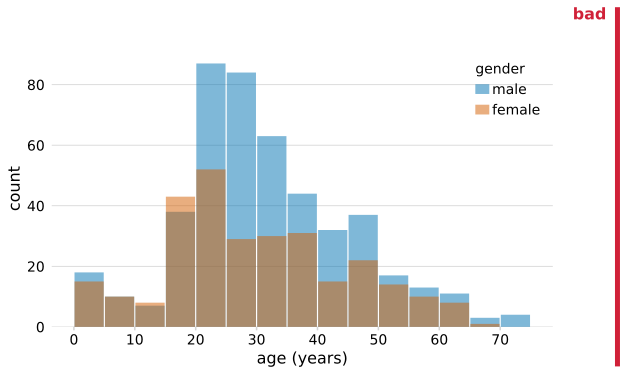

In [179]:
fig, ax = plt.subplots(figsize=figsize_rect)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(titanics[titanics['Sex']=='male']['Age'], color="#0072B2",
                           alpha=0.5, 
                           bins=np.linspace(0, 75, 16),rwidth=0.96, label='male')

ax.hist(titanics[titanics['Sex']=='female']['Age'], color="#D55E00", alpha=0.5,
                           bins=np.linspace(0, 75, 16),rwidth=0.96, label='female')

ax.set_ylabel('count', fontsize=fs_m)
ax.set_xlabel('age (years)', fontsize=fs_m)

for loc in ['right', 'top', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.xaxis.grid(False)

ax.set_yticks([0, 20, 40, 60, 80])

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')


# Move gridlines to the background
ax.set_axisbelow(True)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=fs_s, color='lightgrey',
               width=1.5)

leg = ax.legend(loc='upper right', ncol=1,
          frameon=False,title='gender',
          handlelength=1, handletextpad=0.2, fontsize=fs_s)

leg._legend_box.align = "left"

leg.get_title().set_fontsize(fs_s)  # Set font size

stamp_bad(ax)

plt.show()

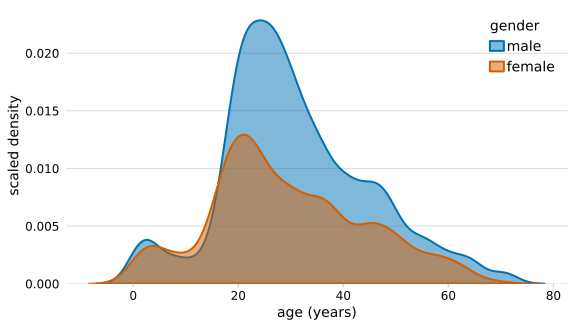

In [223]:
fig, ax = plt.subplots(figsize=figsize_rect)

# Plot the density lines
sns.kdeplot(data=titanics, x='Age', hue='Sex', fill=True, bw_adjust=0.6, alpha=0.5, linewidth=2,
            common_norm=True, hue_order=['female', 'male'], palette=["#D55E00", "#0072B2"], 
            legend=False, ax=ax)

for loc in ['right', 'top', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# Set the x and y labels
ax.set_ylabel('scaled density', fontsize=fs_s)
ax.set_xlabel('age (years)', fontsize=fs_s)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.xaxis.grid(False)

locator = mpl.ticker.MaxNLocator(nbins=5)

ax.yaxis.set_major_locator(locator)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=12, color='lightgrey',
            width=1.5)

leg = ax.legend(loc='upper right', labels=['male', 'female'], 
                frameon=False,title='gender',
          handlelength=1, handletextpad=0.2, fontsize=fs_s)

leg._legend_box.align = "left"

leg.get_title().set_fontsize(fs_s)

plt.show()

In [226]:
# Create the 'age' column
age = np.arange(1, 26) * 3 - 1.5

# Create the 'male' and 'female' columns
bins = np.arange(0, 26) * 3 + 0.01
male = np.histogram(titanics.loc[titanics['Sex'] == 'male', 'Age'], bins=bins)[0]
female = np.histogram(titanics.loc[titanics['Sex'] == 'female', 'Age'], bins=bins)[0]

# Create the DataFrame
gender_counts = pd.DataFrame({'age': age, 'male': male, 'female': female})

# Melt the DataFrame
gender_counts = gender_counts.melt(id_vars='age', var_name='gender', value_name='count')

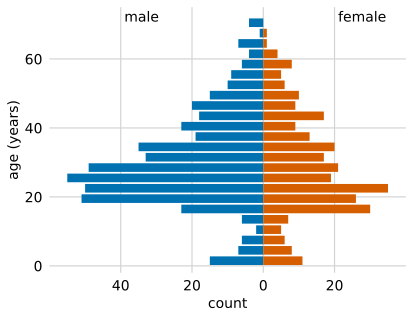

In [255]:
# Create a copy of the data and modify the 'count' column
gender_counts2 = gender_counts.copy()
gender_counts2['count'] = gender_counts2.apply(lambda row: -row['count'] if row['gender'] == 'male' else row['count'], axis=1)

# Separate the data by gender
male_data = gender_counts2[gender_counts2['gender'] == 'male']
female_data = gender_counts2[gender_counts2['gender'] == 'female']

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the bars
ax.barh(male_data['age'], male_data['count'], height=2.5, color='#0072B2')
ax.barh(female_data['age'], female_data['count'], height=2.5, color='#D55E00')

# Set the x and y limits
ax.set_ylim(-2, 75)
ax.set_xlim(-60, 40)

# Set the x and y labels
ax.set_ylabel('age (years)', fontsize=fs_s)
ax.set_xlabel('count', fontsize=fs_s)

# Set the x ticks and labels
ax.set_xticks([-40, -20, 0, 20])
ax.set_xticklabels(['40', '20', '0', '20'])
ax.xaxis.grid(True, color='lightgrey', linewidth=1.2)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.set_yticks([0, 20, 40, 60])
# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey', linewidth=1.2)

# Move gridlines to the background
ax.set_axisbelow(True)

ax.tick_params(axis='both', bottom=False, left=False, labelsize=fs_s)

for loc in ['right', 'top', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# Add text labels
ax.text(-39, 70, 'male', verticalalignment='bottom', fontsize=fs_s)
ax.text(21, 70, 'female', verticalalignment='bottom', fontsize=fs_s)

plt.show()

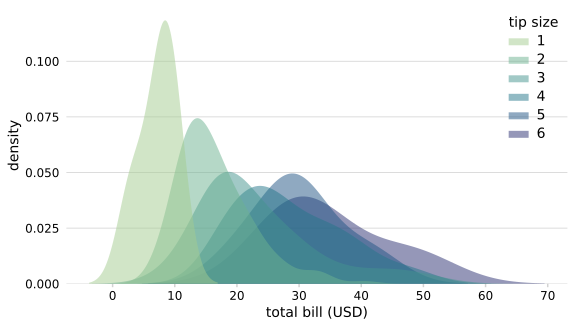

In [277]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots(figsize=figsize_rect)

p = sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax=ax, legend=True
)

for loc in ['right', 'top', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# Set the x and y labels
ax.set_ylabel('density', fontsize=fs_s)
ax.set_xlabel('total bill (USD)', fontsize=fs_s)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.xaxis.grid(False)


locator = mpl.ticker.MaxNLocator(nbins=5)

ax.yaxis.set_major_locator(locator)

# Add horizontal grid lines at the y-tick locations and set their color to light grey
ax.yaxis.grid(True, color='lightgrey')

# Move gridlines to the background
ax.set_axisbelow(True)

ax.tick_params(axis='both', bottom=True, left=False, labelsize=12, color='lightgrey',
            width=1.5)

leg = p.get_legend()
leg.set_frame_on(False)
plt.setp(leg.get_texts(), fontsize=fs_s) 
leg.set_title('tip size')
leg.get_title().set_fontsize(fs_s)
leg._legend_box.align = "left"

# Show the plot
plt.show()

## Histograms and density plots along the horizontal axis

In [67]:
lincoln_df = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'ggridges', 'lincoln_df.csv'))

# Define the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'month_short' column to a categorical variable with the specified order
lincoln_df['month_short'] = pd.Categorical(lincoln_df['month_short'],
                                           categories=month_order, ordered=True)

# Calculate the mean and standard deviation
lincoln_df['Mean Temperature [F]'] = lincoln_df['Mean Temperature [F]'].astype(float)

/Users/doem/anaconda3/envs/vdss/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/doem/anaconda3/envs/vdss/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/doem/anaconda3/envs/vdss/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/doem/anaconda3/envs/vdss/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.ti

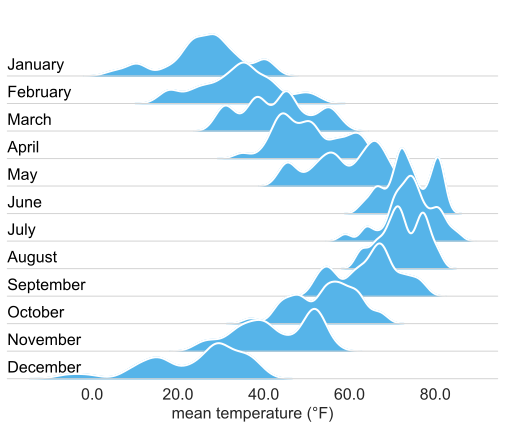

In [108]:
# Initialize the FacetGrid object
g = sns.FacetGrid(lincoln_df, row="Month", hue='Month', aspect=15, height=.5)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Mean Temperature [F]",
      bw_adjust=.5, clip_on=False, color="#56B4E9",
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Mean Temperature [F]", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=1, linestyle="-", color="lightgrey", clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, label, **kwargs):
    ax = plt.gca()
    ax.text(0, .15, label, color='black',
            ha="left", va="center", transform=ax.transAxes,
            fontsize=16)

g.map(label, "Mean Temperature [F]")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.6)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="") #, xlabel='mean temperature (°F)'

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticks(), fontsize=16)

g.set_xlabels('mean temperature (°F)', fontsize=16)  # Increase fontsize here

g.despine(bottom=True, left=True)

g.savefig("ridgeline_plot.svg")